In [ ]:


Logo

    Home Installation Documentation
    Examples 

	
Fork me on GitHub
Previous
Using Functio...
 
Next
Demonstrating...
 
Up
Examples

scikit-learn v0.21.3
Other versions

Please cite us if you use the software.

    Using KBinsDiscretizer to discretize continuous features

Note

Click here to download the full example code
Using KBinsDiscretizer to discretize continuous features

The example compares prediction result of linear regression (linear model) and decision tree (tree based model) with and without discretization of real-valued features.

As is shown in the result before discretization, linear model is fast to build and relatively straightforward to interpret, but can only model linear relationships, while decision tree can build a much more complex model of the data. One way to make linear model more powerful on continuous data is to use discretization (also known as binning). In the example, we discretize the feature and one-hot encode the transformed data. Note that if the bins are not reasonably wide, there would appear to be a substantially increased risk of overfitting, so the discretizer parameters should usually be tuned under cross validation.

After discretization, linear regression and decision tree make exactly the same prediction. As features are constant within each bin, any model must predict the same value for all points within a bin. Compared with the result before discretization, linear model become much more flexible while decision tree gets much less flexible. 
Note that binning features generally has no beneficial effect for tree-based models, as these models can learn to split up the data anywhere.
../../_images/sphx_glr_plot_discretization_001.png

# Author: Andreas Müller
#         Hanmin Qin <qinhanmin2005@sina.com>
# License: BSD 3 clause


In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

print(__doc__)

# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = enc.fit_transform(X)

Automatically created module for IPython interactive environment


In [53]:
X[0:10,:]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547]])

In [40]:
X_binned.shape

(100, 10)

In [44]:
type(X_binned)

scipy.sparse.csr.csr_matrix

In [54]:
print (X_binned[0:10,:])

  (0, 4)	1.0
  (1, 9)	1.0
  (2, 7)	1.0
  (3, 6)	1.0
  (4, 2)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 8)	1.0
  (8, 6)	1.0
  (9, 7)	1.0


Automatically created module for IPython interactive environment


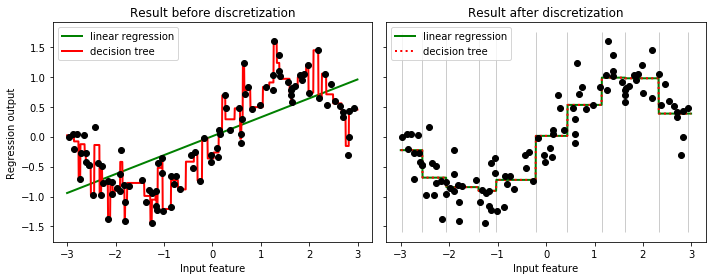

In [37]:
# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = LinearRegression().fit(X, y)

ax1.plot(line, reg.predict(line), linewidth=2, color='green',
         label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)

ax2.plot(line, reg.predict(line_binned), linewidth=2, color='green',
         linestyle='-', label='linear regression')

reg = DecisionTreeRegressor(min_samples_split=3,
                            random_state=0).fit(X_binned, y)

ax2.plot(line, reg.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()


In [ ]:

Total running time of the script: ( 0 minutes 0.122 seconds)
Download Python source code: plot_discretization.py
Download Jupyter notebook: plot_discretization.ipynb

Gallery generated by Sphinx-Gallery
© 2007 - 2019, scikit-learn developers (BSD License). Show this page source
Previous
Next


In [5]:
import pandas as pd

df_train_for_cv_used = pd.read_pickle("/home/osboxes/proj/bikesharing/p04_model/data/df_train_for_cv_o_n_all_variables.pkl")

In [6]:
# X = df_train_for_cv_used[["NO_temp"]] 
X = df_train_for_cv_used[["CO_hour"]] 

In [8]:
X.describe()

,CO_hour
count,10886
unique,24
top,14
freq,456


In [9]:
list(df_train_for_cv_used)

['CN_school',
 'CN_soleilQ',
 'CN_tendance_1Q',
 'CN_tendance_2Q',
 'CO_atempQ',
 'CO_day',
 'CO_holiday',
 'CO_humidityQ',
 'CO_month',
 'CO_season',
 'CO_tempQ',
 'CO_weather',
 'CO_windspeedQ',
 'CO_workingday',
 'NN_soleil',
 'NN_tendance_1',
 'NN_tendance_2',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_windspeed',
 'S_casual',
 'S_casualQ',
 'S_rateregis',
 'S_rateregisQ',
 'S_registered',
 'S_registeredQ',
 'datetime',
 'CO_hour',
 'CO_year',
 'count',
 'CO_day_labels_encoding',
 'CO_month_labels_encoding',
 'CO_season_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_hour_labels_encoding',
 'CO_year_labels_encoding',
 'CO_hour_mean_encoding',
 'CO_month_mean_encoding',
 'CO_day_mean_encoding',
 'CO_hour_ordinal_encoding',
 'CO_month_ordinal_encoding',
 'CO_day_ordinal_encoding',
 'CO_weather_ordinal_encoding',
 'CO_season_ordinal_encoding',
 'CO_year_ordinal_encoding',
 'CN_type_of_day',
 'CN_week_end']

In [25]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn import tree

name_var = 'S_registered'
# name_var = 'S_casual'
# name_var = 'count'

# max_leaf_nodes_value = 15
max_leaf_nodes_value = 8

Y = df_train_for_cv_used[[name_var]] 

In [26]:
Y.describe()

,S_registered
count,10886.000000
mean,155.552177
std,151.039033
min,0.000000
25%,36.000000
50%,118.000000
75%,222.000000
max,886.000000


In [27]:
Y['log'] = Y[name_var].map(lambda x: np.log1p(x))
Y = Y.drop(name_var, axis = 1)

/home/osboxes/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
X.shape

(10886, 1)

In [29]:
# model_regtree = DecisionTreeRegressor(min_samples_split=1500, random_state=0)
model_regtree = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes_value)
reg = model_regtree.fit(X, Y)

In [30]:
reg.predict(np.array([[5]]))

array([2.68963243])

In [31]:
tree.plot_tree(reg) 

[Text(220.44444444444446, 338.79999999999995, 'X[0] <= 5.5\nentropy = 1.958\nsamples = 10886\nvalue = 4.396'),
 Text(110.22222222222223, 277.2, 'X[0] <= 1.5\nentropy = 1.103\nsamples = 2684\nvalue = 2.532'),
 Text(55.111111111111114, 215.59999999999997, 'entropy = 0.869\nsamples = 909\nvalue = 3.221'),
 Text(165.33333333333334, 215.59999999999997, 'X[0] <= 4.5\nentropy = 0.855\nsamples = 1775\nvalue = 2.179'),
 Text(110.22222222222223, 154.0, 'entropy = 0.8\nsamples = 1323\nvalue = 2.005'),
 Text(220.44444444444446, 154.0, 'entropy = 0.668\nsamples = 452\nvalue = 2.69'),
 Text(330.6666666666667, 277.2, 'X[0] <= 6.5\nentropy = 0.729\nsamples = 8202\nvalue = 5.006'),
 Text(275.55555555555554, 215.59999999999997, 'entropy = 1.275\nsamples = 455\nvalue = 3.846'),
 Text(385.7777777777778, 215.59999999999997, 'X[0] <= 21.5\nentropy = 0.614\nsamples = 7747\nvalue = 5.074'),
 Text(330.6666666666667, 154.0, 'X[0] <= 15.5\nentropy = 0.562\nsamples = 6835\nvalue = 5.169'),
 Text(275.5555555555555

In [32]:
import graphviz 
dot_data = tree.export_graphviz(model_regtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree_without_log_for_" + name_var + "_" + str(max_leaf_nodes_value)) 

'tree_without_log_for_S_registered_8.pdf'

In [85]:
dot_data = tree.export_graphviz(model_regtree, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ValueError: Length of feature_names, 4 does not match number of features, 1